In [1]:
import pandas as pd

# Specify the file path
file_path = "/home/martin/Documents/Exjobb/eed/.data/augmented_data/train/augmented_data_0_noise_0_train.parquet"

# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)
df["label"] = df["label"].astype(int)

df['acc_averaged'] = df['acc_averaged'].apply(lambda x: x[0])

In [2]:
df.describe()
#df["acc_averaged"].describe()


,t,x,y,label,file_index,fs,std,std-diff,mean-diff,med-diff,bcea,bcea_diff,rms,rms-diff,disp,vel,acc,acc_averaged,rayleightest
count,323411.000000,306966.000000,306966.000000,323411.000000,323411.000000,323411.0,323411.000000,323411.000000,323411.000000,323411.000000,3.234110e+05,3.234110e+05,323411.000000,3.234110e+05,323411.000000,323411.000000,3.234110e+05,323411.000000,3.234110e+05
mean,40.500875,0.121262,0.035030,1.360034,1.499998,1000.0,0.500071,0.737941,1.365418,1.393892,1.234547e+00,2.155819e+00,0.079836,6.979878e-01,2.017627,19.844666,1.060441e+03,1060.515953,1.465737e-04
std,23.340215,12.675233,7.887902,1.023437,1.118037,0.0,1.530562,1.882577,3.729763,4.284300,1.161138e+01,1.585624e+01,0.300564,1.961598e+00,5.608034,72.584481,3.821393e+03,3062.813459,8.731894e-03
min,0.075000,-33.643299,-16.410707,0.000000,0.000000,1000.0,0.020312,0.000000,0.000072,0.000000,6.254440e-08,5.401210e-14,0.001567,4.459417e-07,0.134735,0.002832,2.832985e-10,0.000093,3.100418e-18
25%,20.288000,-11.155375,-7.359219,1.000000,0.500000,1000.0,0.036456,0.004351,0.044333,0.042607,4.281011e-03,9.351988e-04,0.035174,2.078321e-02,0.237134,0.846695,5.309067e+01,69.335911,3.100662e-18
50%,40.501000,0.148208,0.129345,1.000000,1.000000,1000.0,0.046357,0.013006,0.077900,0.071753,6.608412e-03,2.870038e-03,0.043010,4.808022e-02,0.296417,1.475765,9.828801e+01,106.035468,3.101002e-18
75%,60.714000,10.977525,7.537069,1.000000,2.500000,1000.0,0.073161,0.190167,0.260779,0.141772,1.459218e-02,6.458920e-02,0.056756,1.565897e-01,0.468877,2.510649,1.979072e+02,230.253346,3.102751e-18
max,80.927000,26.944281,42.080399,5.000000,3.000000,1000.0,22.444861,22.410931,45.133120,46.099458,8.327474e+02,8.327474e+02,14.473279,2.045983e+01,69.434271,1357.172929,1.551943e+05,82695.886763,9.875784e-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323611 entries, 0 to 323610
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   t             323611 non-null  float64
 1   x             307166 non-null  float32
 2   y             307166 non-null  float32
 3   status        323611 non-null  bool   
 4   label         323611 non-null  int64  
 5   file_index    323611 non-null  int64  
 6   file_name     323611 non-null  object 
 7   fs            323611 non-null  int64  
 8   std           323611 non-null  float64
 9   std-diff      323611 non-null  float64
 10  mean-diff     323611 non-null  float64
 11  med-diff      323611 non-null  float64
 12  bcea          323611 non-null  float64
 13  bcea_diff     323611 non-null  float64
 14  rms           323611 non-null  float64
 15  rms-diff      323611 non-null  float64
 16  disp          323611 non-null  float64
 17  vel           323611 non-null  float64
 18  acc 

### Distribution of labels

label
0      1443
1    274064
2     18847
3      8950
5     20307
Name: count, dtype: int64
Percentage of fixations:  84.69 %
Percentage of saccades:  5.82 %


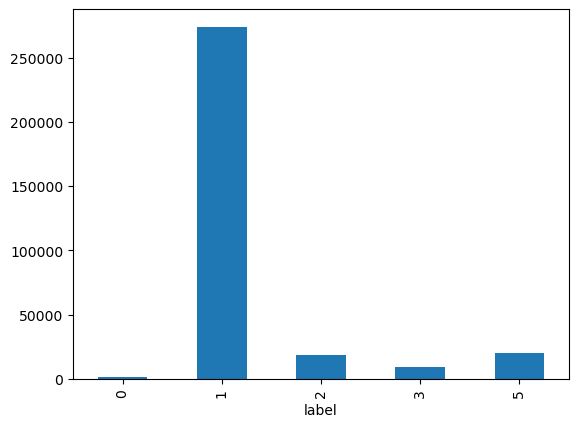

In [4]:
df['label'].value_counts().sort_index().plot(kind='bar')
print(df['label'].value_counts().sort_index())
fixation_percentage = round((df['label'].value_counts().sort_index()[1] / df['label'].value_counts().sum()) * 100, 2)
saccade_percentage = round((df['label'].value_counts().sort_index()[2] / df['label'].value_counts().sum()) * 100, 2)

print("Percentage of fixations: ", fixation_percentage, "%")
print("Percentage of saccades: ", saccade_percentage, "%")


### Distribution of labels when only looking at fixations and saccades

             t          x          y  status  label  file_index  \
0        0.075   0.741042   8.617642    True      5           0   
1        0.076   0.730262   9.304790    True      5           0   
2        0.077   0.786852  10.091642    True      5           0   
3        0.078   1.037459  10.886578    True      5           0   
4        0.079        NaN        NaN   False      5           0   
...        ...        ...        ...     ...    ...         ...   
323406  80.923 -17.237980   0.587444    True      1           3   
323407  80.924 -17.221811   0.617086    True      1           3   
323408  80.925 -17.237980   0.595527    True      1           3   
323409  80.926 -17.229897   0.590139    True      1           3   
323410  80.927 -17.235285   0.592833    True      1           3   

                    file_name    fs       std  std-diff  ...   med-diff  \
0       lookAtPoint_EL_S1.npy  1000  6.544364  0.834818  ...  15.419528   
1       lookAtPoint_EL_S1.npy  1000  6.521650

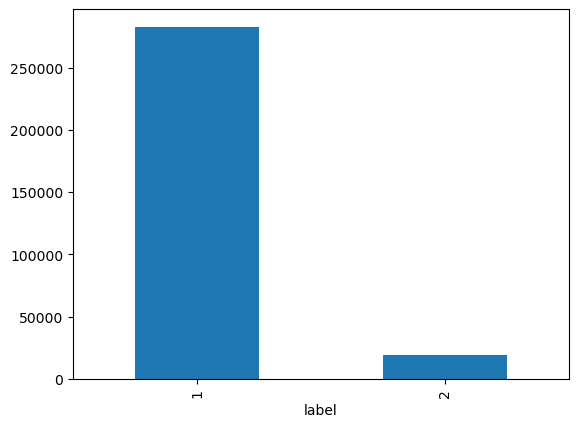

In [4]:
df_na_dropped = df.dropna()
print(df)
# Reassign labels 3 and 4 to label 1
df_na_dropped.loc[:, 'label'] = df_na_dropped['label'].replace({3: 1, 4: 1})

# Remove samples with label 1 and 5
df_na_dropped = df_na_dropped[(df_na_dropped['label'] != 5) & (df_na_dropped['label'] != 0)]

df_na_dropped['label'].value_counts().sort_index().plot(kind='bar')
print(df_na_dropped['label'].value_counts().sort_index())
fixation_percentage = round((df_na_dropped['label'].value_counts().sort_index()[1] / df_na_dropped['label'].value_counts().sum()) * 100, 2)
saccade_percentage = round((df_na_dropped['label'].value_counts().sort_index()[2] / df_na_dropped['label'].value_counts().sum()) * 100, 2)

print("Percentage of fixations: ", fixation_percentage, "%")
print("Percentage of saccades: ", saccade_percentage, "%")


In [5]:
features = df_na_dropped.drop(columns=['label',"x", "y","t", "status", "file_index", "file_name"])
features.describe()

,fs,std,std-diff,mean-diff,med-diff,bcea,bcea_diff,rms,rms-diff,disp,vel,acc,acc_averaged,rayleightest
count,301681.0,301681.000000,3.016810e+05,301681.000000,301681.000000,301681.000000,3.016810e+05,301681.000000,3.016810e+05,301681.000000,301681.000000,301681.000000,301681.000000,3.016810e+05
mean,1000.0,0.402718,6.672276e-01,1.168176,1.155813,0.617079,1.453697e+00,0.065540,5.870886e-01,1.685347,15.654990,820.342531,830.193273,1.071698e-04
std,0.0,1.298804,1.766506e+00,3.423968,3.880948,3.636357,9.746058e+00,0.139246,1.710466e+00,4.892057,61.255568,2696.560361,2169.324399,7.300670e-03
min,1000.0,0.020312,7.459546e-08,0.000072,0.000000,0.001445,1.920186e-08,0.023089,4.459417e-07,0.134735,0.002832,0.110051,23.773975,3.100442e-18
25%,1000.0,0.037223,4.826530e-03,0.042334,0.040510,0.004479,1.043857e-03,0.035837,2.066057e-02,0.242522,0.809351,57.640736,72.138478,3.100680e-18
50%,1000.0,0.046542,1.321998e-02,0.071758,0.067368,0.006700,2.918473e-03,0.043243,4.719994e-02,0.296417,1.374645,100.671043,107.197015,3.101012e-18
75%,1000.0,0.069392,1.636270e-01,0.218247,0.130824,0.013620,5.180493e-02,0.055861,1.330007e-01,0.439237,2.402530,193.112664,211.947124,3.102532e-18
max,1000.0,14.649297,2.229705e+01,30.514002,38.477447,115.631736,8.326798e+02,14.213589,1.848929e+01,53.899342,668.341933,61320.771234,30688.160946,9.875784e-01


## PCA analysis of features

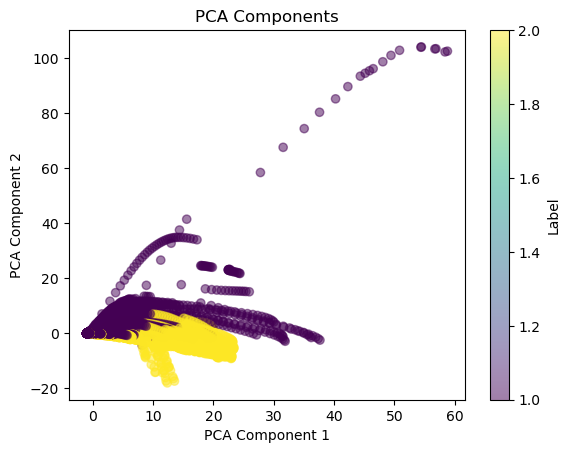

In [6]:
# Perform PCA with 2 components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Perform PCA on the normalized features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_features)

# Create a scatter plot of the PCA components, color-coded by labels
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_na_dropped["label"],alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Components')
plt.colorbar(label='Label')
plt.show()


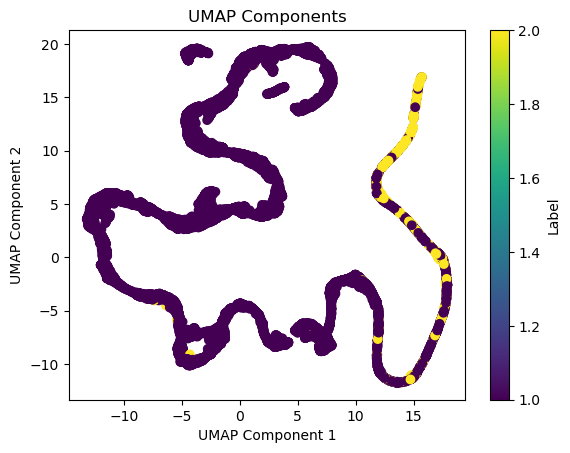

In [8]:
import umap as umap

# Sample 1000 samples
sample_df = df_na_dropped.sample(n=10000, random_state=42)

# Perform UMAP with 2 components on the sampled data
umap_components = umap.UMAP(n_components=2).fit_transform(sample_df[features.columns])

# Create a scatter plot of the UMAP components, color-coded by labels
plt.scatter(umap_components[:, 0], umap_components[:, 1], c=sample_df["label"])
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Components')
plt.colorbar(label='Label')
plt.show()


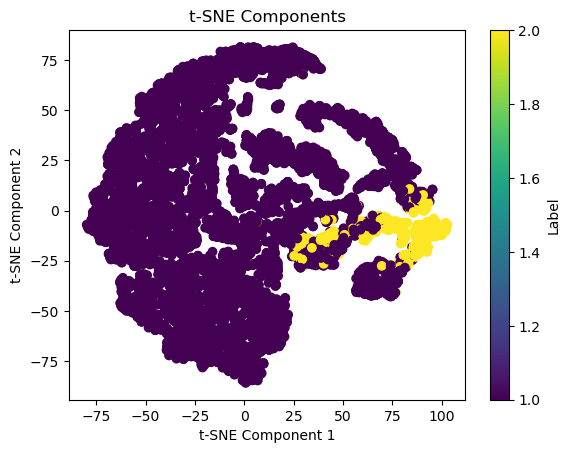

In [9]:

from sklearn.manifold import TSNE
sample_df = df_na_dropped.sample(n=10000, random_state=42)
normalized_features = scaler.fit_transform(sample_df[features.columns])


# Perform t-SNE with 2 components on the normalized features
tsne_components = TSNE(n_components=2).fit_transform(normalized_features)

# Create a scatter plot of the t-SNE components, color-coded by labels
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=sample_df["label"])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components')
plt.colorbar(label='Label')
plt.show()


### Sns pairplot

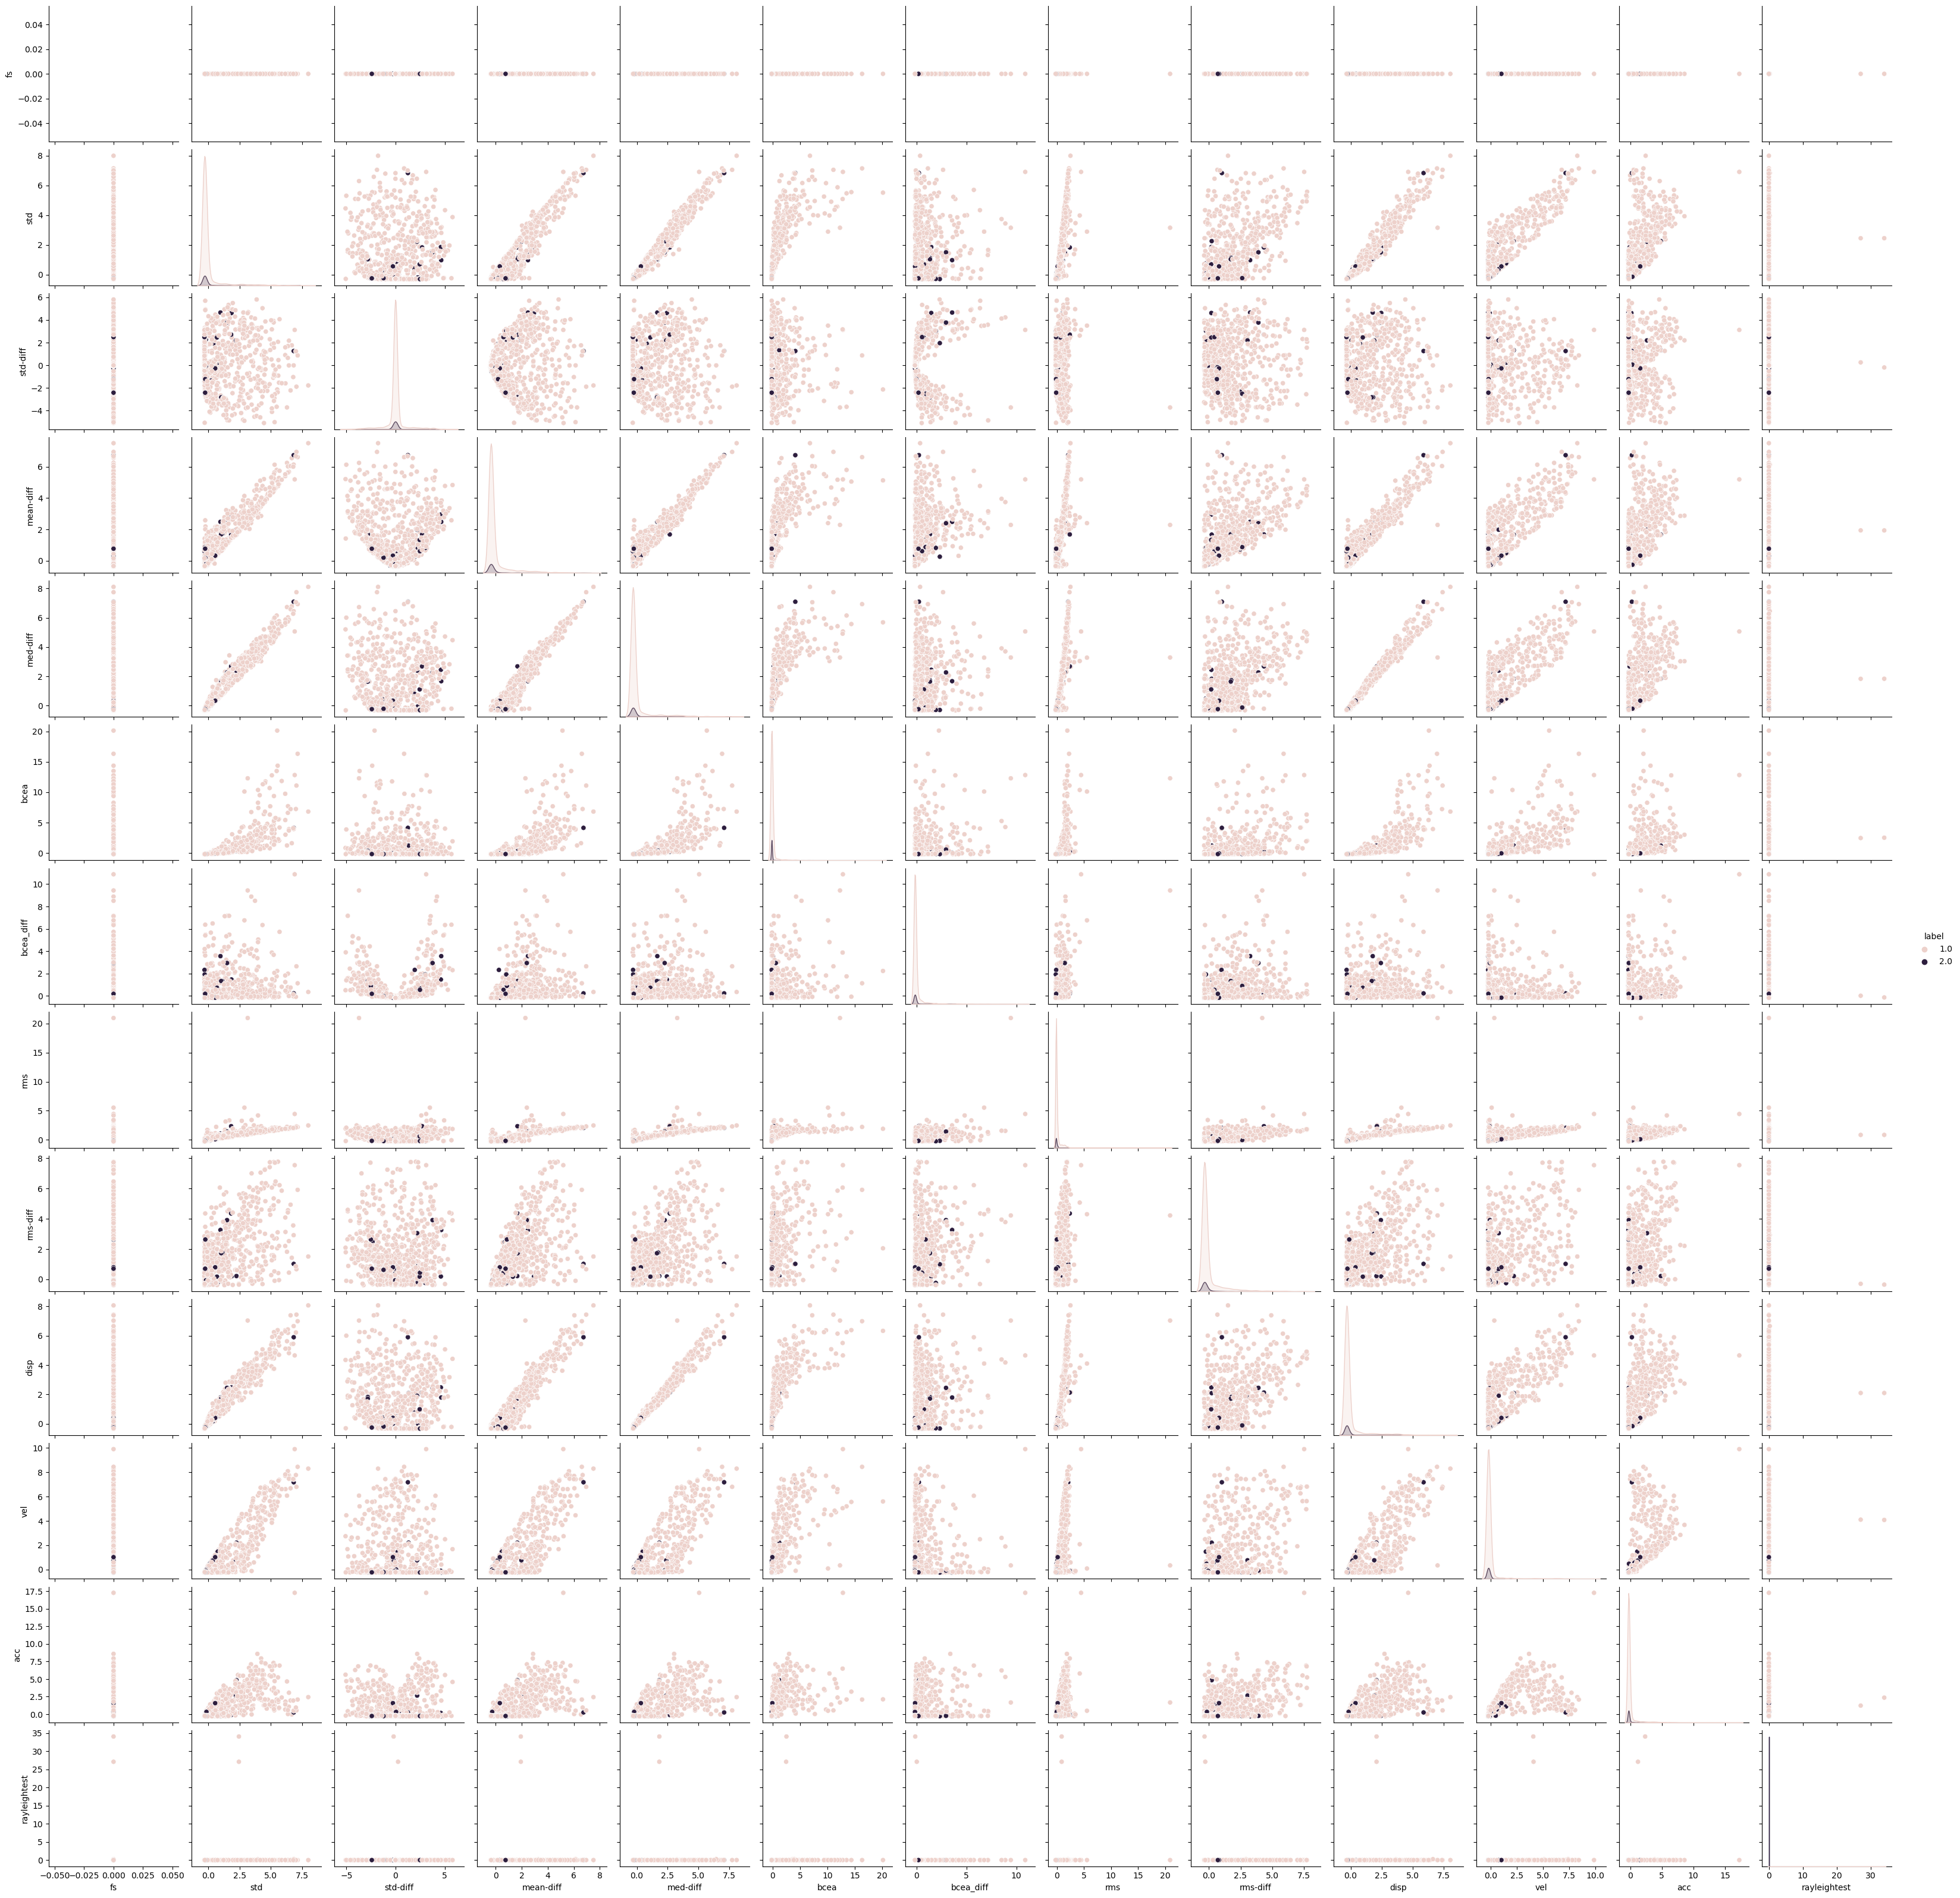

In [10]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
# Concatenate the features and labels into a single DataFrame
df_concat = pd.concat([features, df_na_dropped['label']], axis=1)

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df_concat.iloc[:, :-1])

# Create a DataFrame with the normalized features and label
normalized_df = pd.DataFrame(normalized_features, columns=df_concat.columns[:-1])
normalized_df['label'] = df_concat['label']

# Randomly extract a subset of the data
subset_df = normalized_df.sample(n = 5000, random_state=42)

# Create a pairplot
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sns.pairplot(subset_df, hue='label')


## Print correlations between features

In [10]:
correlation_matrix = features.corr()
correlation_ranking = correlation_matrix.unstack().sort_values(ascending=False)
correlation_ranking = correlation_ranking[correlation_ranking != 1]
pd.options.display.max_rows = 4000
print(correlation_ranking[1:400])


std           vel             0.995646
              med-diff        0.993492
med-diff      std             0.993492
std           disp            0.989332
disp          std             0.989332
              med-diff        0.989090
med-diff      disp            0.989090
vel           med-diff        0.988578
med-diff      vel             0.988578
mean-diff     med-diff        0.985493
med-diff      mean-diff       0.985493
disp          vel             0.980102
vel           disp            0.980102
disp          mean-diff       0.975651
mean-diff     disp            0.975651
std           mean-diff       0.975154
mean-diff     std             0.975154
vel           mean-diff       0.967008
mean-diff     vel             0.967008
rms-diff      mean-diff       0.846866
mean-diff     rms-diff        0.846866
disp          rms-diff        0.828900
rms-diff      disp            0.828900
              std             0.828390
std           rms-diff        0.828390
med-diff      rms-diff   

## Plot distributions of different features for saccades and fixations 

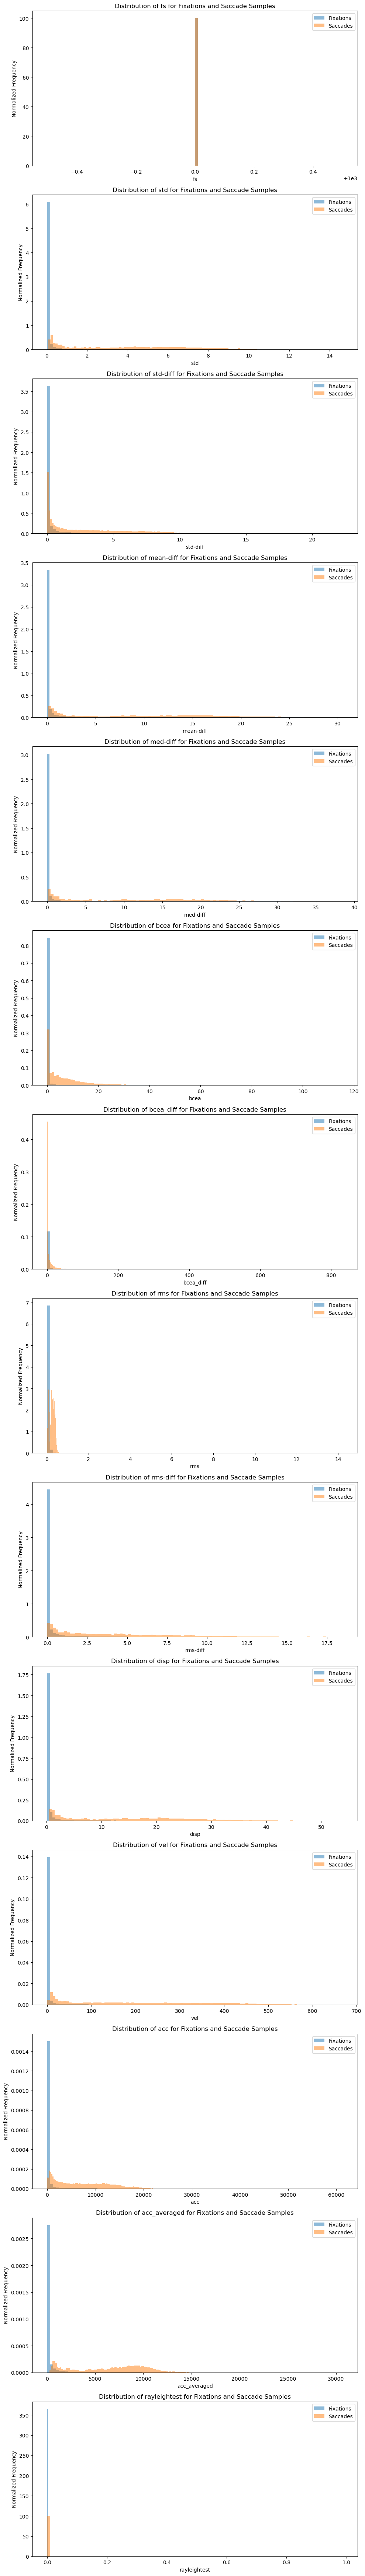

In [7]:
import matplotlib.pyplot as plt

# Get the list of feature column names
feature_columns = list(features.columns)

# Set the number of rows and columns for the subplots
num_rows = len(feature_columns)
num_cols = 1

# Create subplots for each feature
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

# Iterate over the feature columns
for i, feature in enumerate(feature_columns):
    # Extract samples where the label is 1
    label_1_samples = df_na_dropped[df_na_dropped['label'] == 1]

    # Extract samples where the label is 2
    label_2_samples = df_na_dropped[df_na_dropped['label'] == 2]

    # Plot the distribution of the feature for label 1 samples
    axs[i].hist(label_1_samples[feature], bins=100, alpha=0.5, label='Fixations', density=True)
    axs[i].hist(label_2_samples[feature], bins=100, alpha=0.5, label='Saccades', density=True)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Normalized Frequency')
    axs[i].set_title(f'Distribution of {feature} for Fixations and Saccade Samples')
    #axs[i].set_yscale('log')
    axs[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


# Variable importance with random forest


         Feature  Importance
10           vel    0.217028
5           bcea    0.153026
12  acc_averaged    0.103760
1            std    0.095770
4       med-diff    0.083703
2       std-diff    0.078397
11           acc    0.052704
3      mean-diff    0.052668
6      bcea_diff    0.052448
9           disp    0.046502
7            rms    0.045078
8       rms-diff    0.018806
13  rayleightest    0.000109
0             fs    0.000000


<BarContainer object of 14 artists>

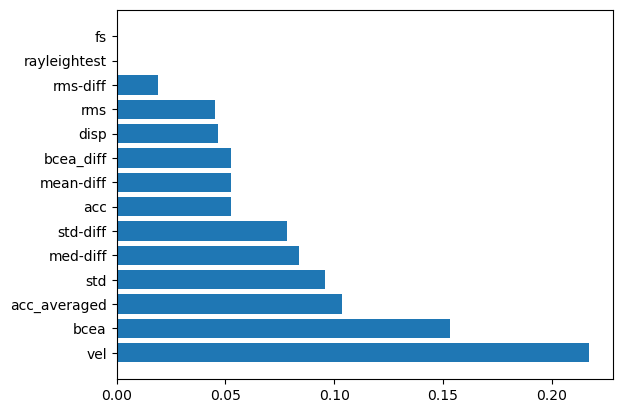

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to your data
rf_classifier.fit(features, df_na_dropped['label'])

# Get the feature importances
importances = rf_classifier.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort the dataframe by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)
plt.barh(feature_importances['Feature'], feature_importances['Importance'])


## Plot features

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_na_dropped.select_dtypes(include=np.number))

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_na_dropped.select_dtypes(include=np.number).columns)

# Create a scatter plot for each numeric column in df_na_dropped
fig = go.Figure()
xx = np.array(range(len(df_na_dropped['x'])))
for column in df_na_dropped.select_dtypes(include=np.number).columns:
    fig.add_trace(go.Scatter(x=xx, y=df_scaled[column], name=column))

# Update layout
fig.update_layout(title='Plot of Numeric Features (Scaled)',
                  xaxis_title='Time',
                  yaxis_title='Scaled Value',
                  showlegend=True)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_na_dropped.select_dtypes(include=np.number))

# Create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df_na_dropped.select_dtypes(include=np.number).columns)

# Create subplots with shared x-axis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add a trace for each numeric column in df_na_dropped to the first subplot
xx = np.array(range(len(df_na_dropped['x'])))
for column in df_na_dropped.select_dtypes(include=np.number).columns:
    fig.add_trace(go.Scatter(x=xx, y=df_scaled[column], name=column), row=1, col=1)

# Add a trace for each numeric column in df_na_dropped to the second subplot
for column in df_na_dropped.select_dtypes(include=np.number).columns:
    fig.add_trace(go.Scatter(x=xx, y=df_scaled[column], name=column), row=2, col=1)

# Update layout for the first subplot
fig.update_layout(title='Plot of Numeric Features (Scaled)',
                  xaxis_title='Time',
                  yaxis_title='Scaled Value',
                  showlegend=True)

# Update layout for the second subplot
fig.update_layout(xaxis2=dict(matches='x'),
                  yaxis2=dict(showticklabels=False),
                  xaxis3=dict(matches='x'),
                  yaxis3=dict(showticklabels=False))

fig.show()